## Cars Dataset - Basic EDA and Regression Modelling

**Cars dataset originally found here:<br>**
**https://www.kaggle.com/datasets/ljanjughazyan/cars1**

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV
import seaborn as sns
import statsmodels.api as sm

In [54]:
df = pd.read_csv("CARS.csv")
cars = pd.read_csv("CARS.csv")

In [55]:
# data cleaning
df['MSRP'] = [x.replace('$', '') for x in df['MSRP']] 
df['MSRP'] = [x.replace(',', '') for x in df['MSRP']]
df['MSRP']=pd.to_numeric(df['MSRP'],errors='coerce')
df['Invoice'] = [x.replace('$', '') for x in df['Invoice']] 
df['Invoice'] = [x.replace(',', '') for x in df['Invoice']]
df['Invoice']=pd.to_numeric(df['Invoice'],errors='coerce')

In [56]:
# dropping cars with no cylinders listed
# (in this case the Mazda RX-8s are removed since they use a use a rotary engine.)
df[df['Cylinders'].isna()]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
247,Mazda,RX-8 4dr automatic,Sports,Asia,Rear,25700,23794,1.3,NaN,197,18,25,3053,106,174
248,Mazda,RX-8 4dr manual,Sports,Asia,Rear,27200,25179,1.3,NaN,238,18,24,3029,106,174


In [57]:
# dropping cars with no cylinders listed
# (in this case the Mazda RX-8s are removed since they use a use a rotary engine (has no cylinders.)
df = df.dropna()

In [58]:
# dependent variable(s) MSRP, Invoice
y = df['MSRP']
y_invoice = df['Invoice']
df.drop(['MSRP', 'Invoice'], axis=1, inplace=True)

In [59]:
quant_cols = [f for f in df.columns if df.dtypes[f] != 'object']
qual_cols = [f for f in df.columns if df.dtypes[f] == 'object']

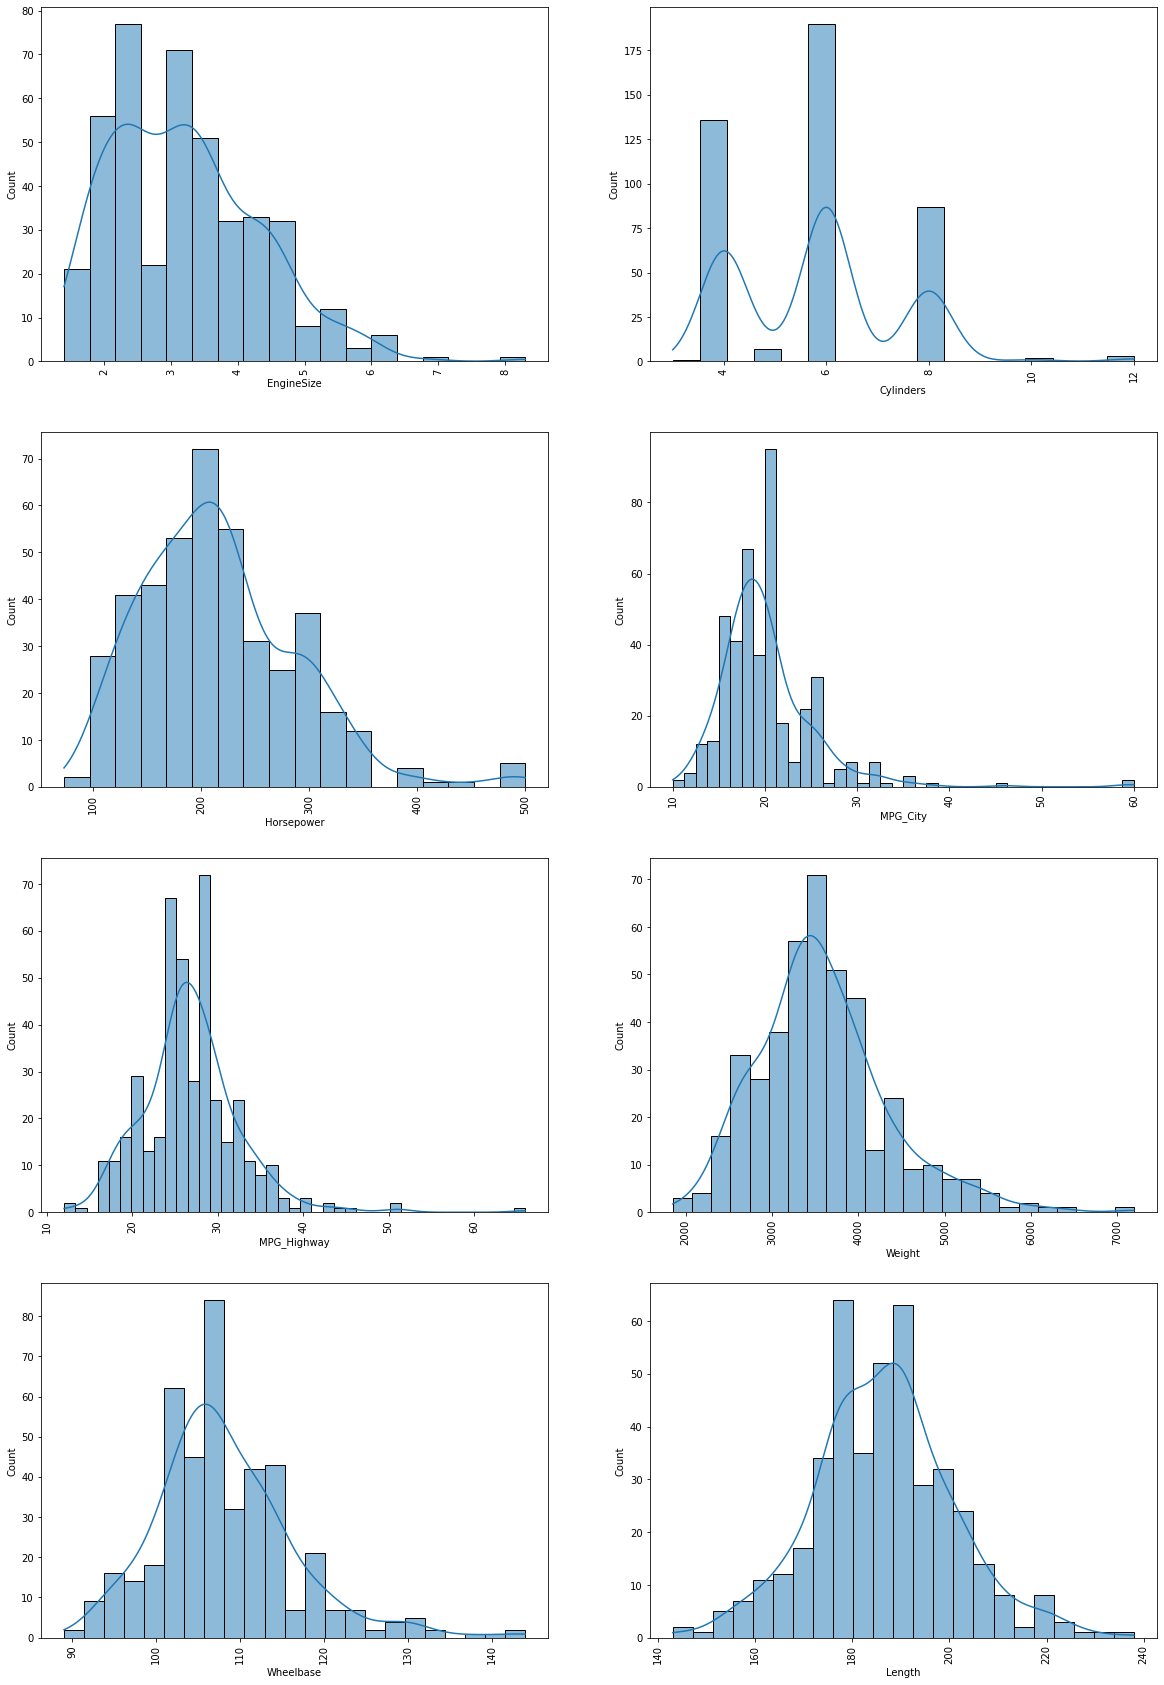

In [60]:
numRows = 4
numCols = 2
rowCount = 0
colCount = 0

fig, axes = plt.subplots(numRows, numCols, figsize=(20, 30))

for c in quant_cols:
    axes[rowCount, colCount].tick_params(axis='x', rotation=90)
    sns.histplot(ax=axes[rowCount, colCount], data=df, kde=True, x=c)
    colCount += 1
    if (colCount == numCols):
        colCount = 0
        rowCount += 1
        if (rowCount == numRows):
            break

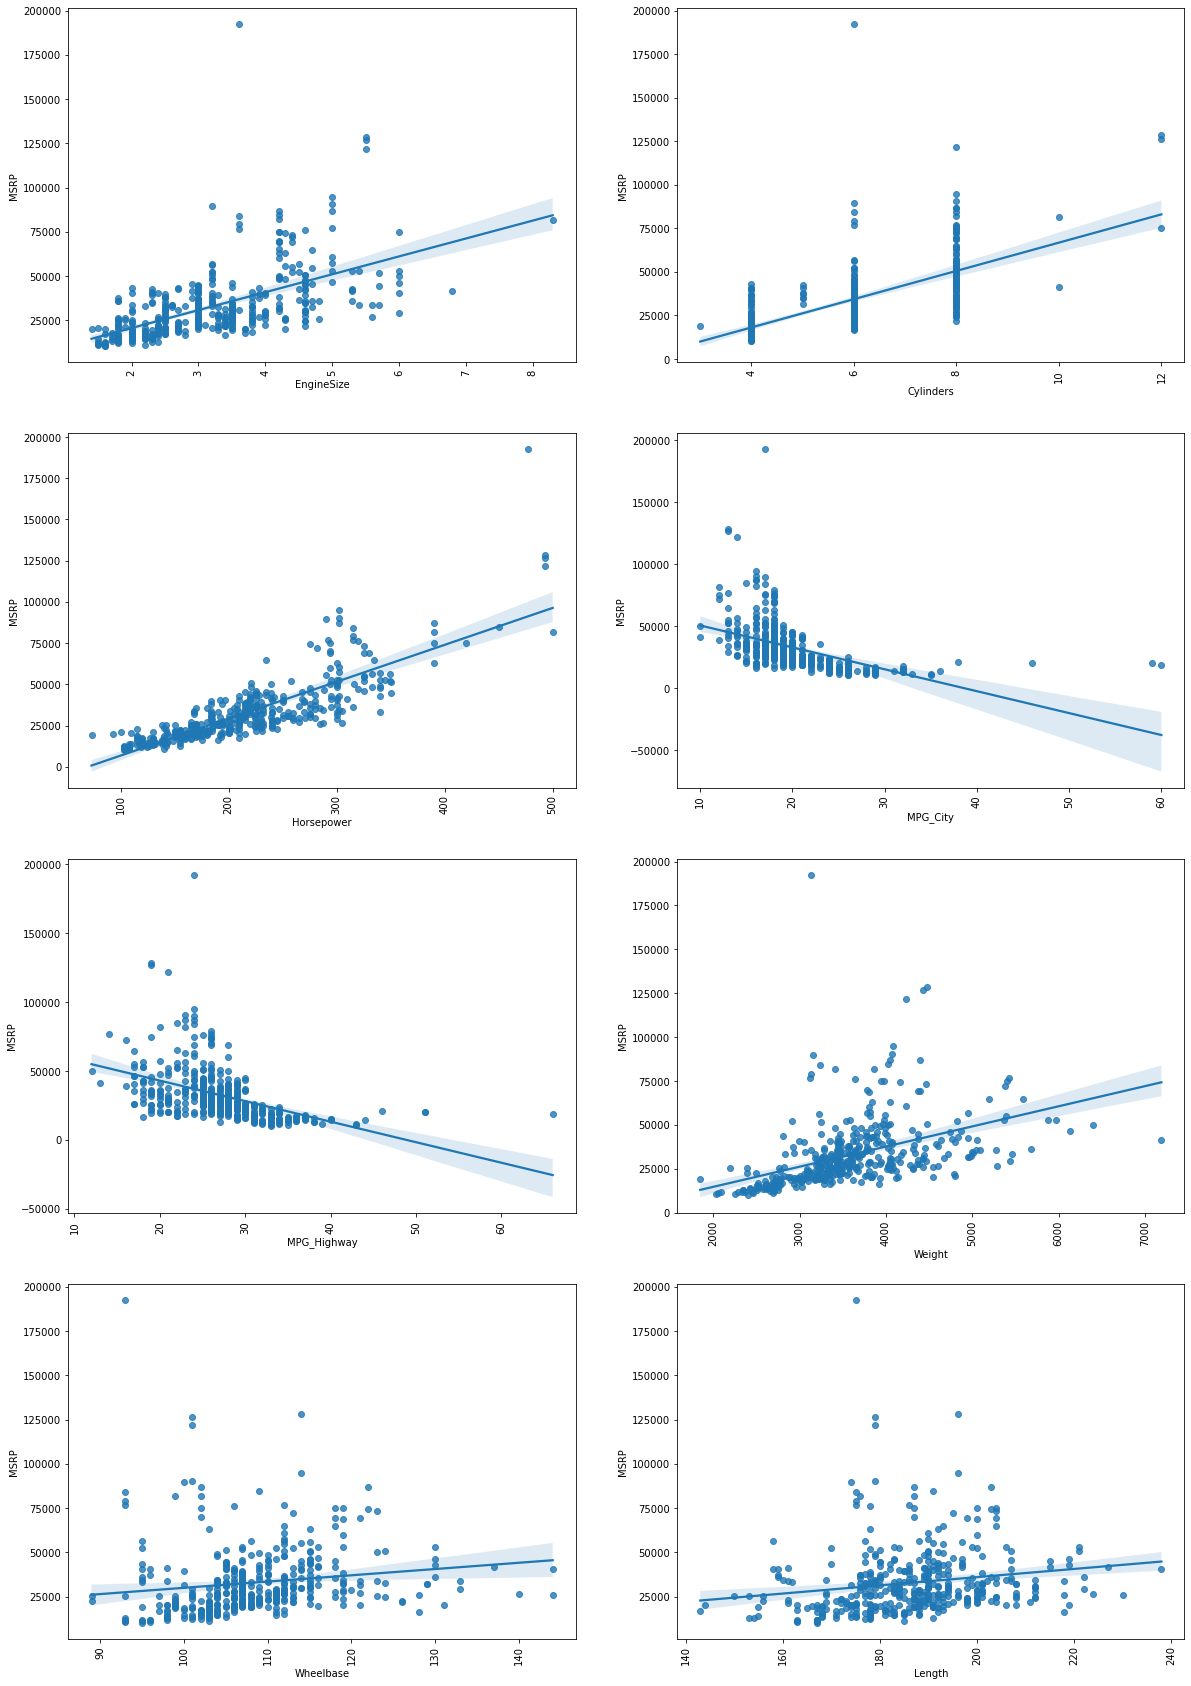

In [61]:
numRows = 4
numCols = 2
rowCount = 0
colCount = 0

fig, axes = plt.subplots(numRows, numCols, figsize=(20, 30))

for c in quant_cols:
    axes[rowCount, colCount].tick_params(axis='x', rotation=90)
    sns.regplot(ax=axes[rowCount, colCount], data=df, x=c, y=y)
    colCount += 1
    if (colCount == numCols):
        colCount = 0
        rowCount += 1
        if (rowCount == numRows):
            break

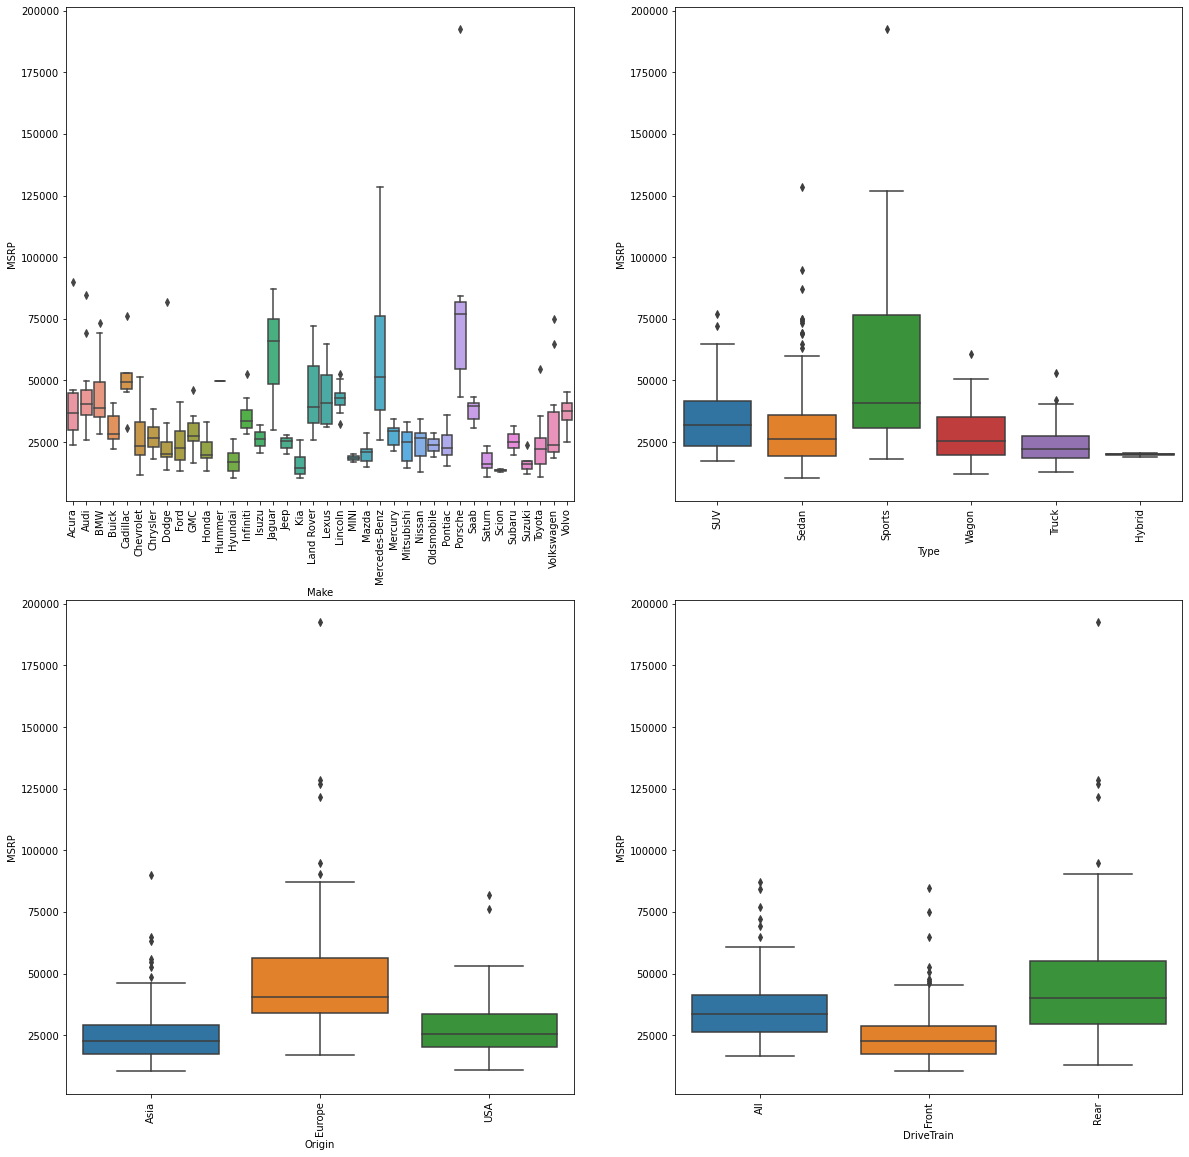

In [62]:
numRows = 2
numCols = 2
rowCount = 0
colCount = 0

fig, axes = plt.subplots(numRows, numCols, figsize=(20, 20))

df_qual = df[qual_cols]

for c in df_qual:
    if (c != 'Model'):
        axes[rowCount, colCount].tick_params(axis='x', rotation=90)
        sns.boxplot(ax=axes[rowCount, colCount], data=df, x=c, y=y)
        colCount += 1
        if (colCount == numCols):
            colCount = 0
            rowCount += 1
            if (rowCount == numRows):
                break

In [63]:
X = df[quant_cols].copy()
# model tuning - tried removing the following features, get worse results =P
#X.drop(['Weight', 'Length','MPG_City','Wheelbase'], axis=1, inplace=True)

In [171]:
X.head()

,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,3.5,6.0,265,17,23,4451,106,189
1,2.0,4.0,200,24,31,2778,101,172
2,2.4,4.0,200,22,29,3230,105,183
3,3.2,6.0,270,20,28,3575,108,186
4,3.5,6.0,225,18,24,3880,115,197


In [65]:
# create training/test data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [172]:
alpha = 0.20
model = ElasticNet(alpha=alpha)
K = 5

# KFold regression testing
kf = KFold(n_splits=K, shuffle=True, random_state=42)
score = cross_val_score(model, X, y, cv=kf)
print(f'Scores for each fold: {score}')
print("Accuracy: %0.4f (+/- %0.4f)" % (score.mean(), score.std() * 2))

Scores for each fold: [0.7660335  0.67231199 0.64786327 0.76839212 0.74367114]
Accuracy: 0.7197 (+/- 0.1000)


In [174]:
fit_model = model.fit(X_train, y_train)
fit_model.score(X_train, y_train)

0.7369808419200072

In [186]:
#alpha = 0
#alpha = 1
#alpha = 0.01
alpha = 0.2

# regression models
#model = LinearRegression()
#model = Ridge(alpha=alpha)
#model = Lasso(alpha=alpha)
model = ElasticNet(alpha=alpha)

In [187]:
# KFold regression testing
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)
score = cross_val_score(model, X, y, cv=kf)
print(f'Scores for each fold: {score}')
print("Accuracy: %0.4f (+/- %0.4f)" % (score.mean(), score.std() * 2))

Scores for each fold: [0.7660335  0.67231199 0.64786327 0.76839212 0.74367114]
Accuracy: 0.7197 (+/- 0.1000)


In [163]:
fit_model = model.fit(X_train, y_train)

In [164]:
fit_model.score(X_train, y_train)

0.7369808419200072

In [165]:
fit_model.score(X_test, y_test)

0.7544165931530863

In [170]:
y_pred = fit_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

8200.035408590475

In [73]:
# Ordinary Least Squares
olsmodel = sm.OLS(y,X)
ols_results = olsmodel.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MSRP   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              729.0
Date:                Fri, 15 Apr 2022   Prob (F-statistic):                   3.90e-240
Time:                        14:48:41   Log-Likelihood:                         -4522.2
No. Observations:                 426   AIC:                                      9060.
Df Residuals:                     418   BIC:                                      9093.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
EngineSize  -4971.5778   1231.240     -4.038      0.000   -7391.772   -2551.384
Cylinders    2844.6244    788.866      3.606      0.000    1293.986    4395.263
Horsepower    246.3339     12.025     20.485      0.000     222.697     269.971
MPG_City      -95.5938    301.915     -0.317      0.752    -689.055     497.868
MPG_Highway   695.9098    292.665      2.378      0.018     120.632    1271.188
Weight          6.8062      1.543      4.410      0.000       3.773       9.840
Wheelbase    -610.8922    141.158     -4.328      0.000    -888.360    -333.424
Length         21.3109     79.113      0.269      0.788    -134.197     176.819
==============================================================================
Omnibus:                      297.320   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7046.482
Skew:                           2.617   Prob(JB):                         0.00
Kurtosis:                      22.224   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Test MSRP Pricing:**

In [175]:
# random sample from test data:
sample = X_test.sample()
y_sample = fit_model.predict(sample)
idx = sample.index
y_msrp = y.iloc[idx]
diff = y_sample - y_msrp
car = cars.iloc[idx]
print("Sample:\n", sample)
print("Predicted MSRP: $%f" %(y_sample))
print("Real MSRP: $%f" %(y_msrp))
print("Difference: $%f" %(diff))
print("Car Info:\n",car)

Sample:
      EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
222         3.0        6.0         215        18           25    3255   

     Wheelbase  Length  
222        105     177  
Predicted MSRP: $32621.226605
Real MSRP: $31045.000000
Difference: $1576.226605
Car Info:
       Make              Model   Type Origin DriveTrain     MSRP  Invoice  \
222  Lexus  IS 300 4dr manual  Sedan   Asia       Rear  $31,045  $27,404   

     EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
222         3.0        6.0         215        18           25    3255   

     Wheelbase  Length  
222        105     177  
